In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

# 读数据

In [2]:
data=pd.read_excel('空气质量.xlsx',
                  parse_dates=['日期']#在读数据时就将日期格式转化完成
                  )
data.head()

,省,城市,日期,质量等级,AQI指数,当天AQI排名,PM2.5,PM10,So2,No2,Co,O3
0,河北,石家庄,2021-08-01,良,51,277,28,48,3,11,0.72,104
1,河北,石家庄,2021-08-02,优,41,186,12,35,4,21,0.50,83
2,河北,石家庄,2021-08-03,优,45,239,20,44,3,21,0.62,91
3,河北,石家庄,2021-08-04,良,62,344,33,57,4,20,0.87,109
4,河北,石家庄,2021-08-05,良,80,364,47,87,5,21,1.03,120


# 数据探索(函数牢记）

## 统计信息

In [3]:
data.describe()

,AQI指数,当天AQI排名,PM2.5,PM10,So2,No2,Co,O3
count,8432.000000,8432.000000,8432.000000,8432.000000,8432.000000,8432.000000,8432.000000,8432.000000
mean,36.793999,187.338472,17.315702,34.581001,6.958373,15.416509,0.606320,69.915441
std,18.368070,103.203986,11.476149,29.591058,3.935013,7.428074,0.212071,26.651083
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,100.000000,10.000000,21.000000,5.000000,10.000000,0.470000,50.000000
50%,34.000000,188.000000,15.000000,30.000000,6.000000,14.000000,0.590000,68.000000
75%,45.000000,276.000000,22.000000,43.000000,8.000000,20.000000,0.710000,89.000000
max,399.000000,366.000000,391.000000,1284.000000,50.000000,54.000000,2.070000,163.000000


## 查看数据信息

In [4]:
data.info()#可以检查是否有缺失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8432 entries, 0 to 8431
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   省        8432 non-null   object        
 1   城市       8432 non-null   object        
 2   日期       8432 non-null   datetime64[ns]
 3   质量等级     8432 non-null   object        
 4   AQI指数    8432 non-null   int64         
 5   当天AQI排名  8432 non-null   int64         
 6   PM2.5    8432 non-null   int64         
 7   PM10     8432 non-null   int64         
 8   So2      8432 non-null   int64         
 9   No2      8432 non-null   int64         
 10  Co       8432 non-null   float64       
 11  O3       8432 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 790.6+ KB


## 查看重复数据

In [5]:
data.duplicated().sum()

0

# 数据探索可视化
+ 前期

In [6]:
#日期转成时间格式
data['日期']=pd.to_datetime(data['日期'])
data['日期']

0      2021-08-01
1      2021-08-02
2      2021-08-03
3      2021-08-04
4      2021-08-05
          ...    
8427   2021-08-27
8428   2021-08-28
8429   2021-08-29
8430   2021-08-30
8431   2021-08-31
Name: 日期, Length: 8432, dtype: datetime64[ns]

In [7]:
#查看时间长度
data['日期'].min(),data['日期'].max()

(Timestamp('2021-08-01 00:00:00'), Timestamp('2021-08-31 00:00:00'))

## 一天的天气污染物占比可视化
+ 以武汉城市为例

In [8]:
index1=data['城市']=='武汉'
index2=data['日期']=='2021-8-1'
day_data=data[index1&index2]
day_data

,省,城市,日期,质量等级,AQI指数,当天AQI排名,PM2.5,PM10,So2,No2,Co,O3
4309,湖北,武汉,2021-08-01,良,86,358,37,75,6,37,0.96,137


In [9]:
pie_data=day_data.loc[:,'PM2.5':'O3'].values[0]#加一个0后减少一个括号，可以对比，实质是改变维度

Text(0.5, 1.0, '{}{}空气污染物占比')

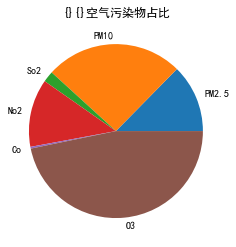

In [10]:
plt.pie(pie_data,
       labels=day_data.loc[:,'PM2.5':'O3'].columns)
plt.title('{}{}空气污染物占比')

### 封装函数

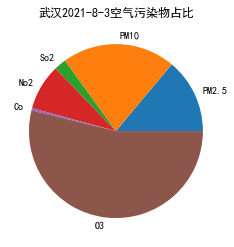

In [11]:
def oneDayPie(city,date):
    index1=data['城市']==city
    index2=data['日期']==date
    day_data=data[index1&index2]
    pie_data=day_data.loc[:,'PM2.5':'O3'].values[0]
    plt.pie(pie_data,
       labels=day_data.loc[:,'PM2.5':'O3'].columns)
    plt.title(f'{city}{date}空气污染物占比')
oneDayPie('武汉','2021-8-3')#别忘了引号 

## 某地一个月AQI数据变化可视化

### 以武汉为例
+ 提取武汉一个月的数据

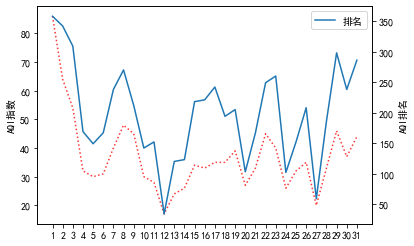

In [12]:
index1=data['城市']=='武汉'
month_data=data[index1]
month_data['AQI指数']

Fig=plt.figure()
ax=Fig.add_subplot(1,1,1)
ax.plot(month_data['AQI指数'],color='#fe3535',linestyle=':',label='指数')
ax.set_ylabel('AQI指数')
plt.xticks(month_data['AQI指数'].index.tolist(),[i+1 for i in range(31)])

ax1=ax.twinx()#使用相同的x轴
ax1.plot(month_data['当天AQI排名'],label='排名')
ax1.set_ylabel('AQI排名')

plt.legend(loc=1)

## AQI排名前十的城市
+ 标记AQI指数

Text(0, 0.5, 'AQI指数')

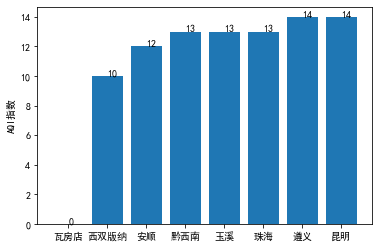

In [13]:
index1=data['日期']=='2021-8-16'
AQI_data=data[index1]
good_data=AQI_data.sort_values(by='当天AQI排名')[:8]
plt.bar(np.arange(8),good_data['AQI指数'])
for i in range(8):
    plt.text(i,
             good_data['AQI指数'].tolist()[i],
            str(good_data['AQI指数'].tolist()[i]))
plt.xticks(np.arange(8),good_data['城市'])
plt.ylabel('AQI指数')
#可以横向排列，bar前面加h即可，不过记得调换xy轴

## 空气污染物分布情况

(array([5.649e+03, 2.518e+03, 2.130e+02, 3.100e+01, 1.100e+01, 4.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.  ,  19.55,  39.1 ,  58.65,  78.2 ,  97.75, 117.3 , 136.85,
        156.4 , 175.95, 195.5 , 215.05, 234.6 , 254.15, 273.7 , 293.25,
        312.8 , 332.35, 351.9 , 371.45, 391.  ]),
 <BarContainer object of 20 artists>)

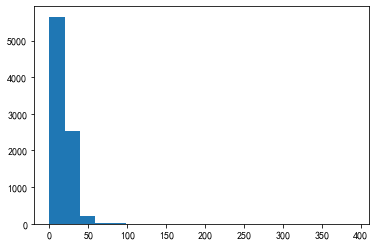

In [14]:
plt.hist(data['PM2.5'].values,bins=20)#默认十个柱子#用bins修改柱子数量

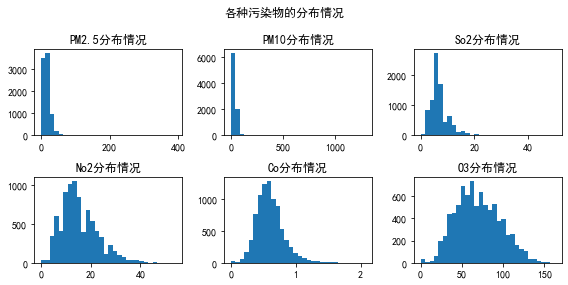

In [15]:
fig=plt.figure(figsize=(8,4))
for i,item in enumerate(data.loc[:,'PM2.5':'O3']):
    fig.add_subplot(2,3,i+1)
    plt.hist(data[item].values,bins=30)
    plt.title(f'{item}分布情况')
plt.suptitle('各种污染物的分布情况')
plt.tight_layout()

In [16]:
#做出的图要加说明（作业要求）

## 每一天全国污染物范围

Text(0.5, 1.0, '全国八月份O3变化情况')

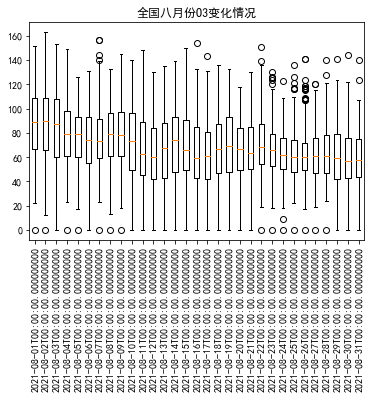

In [43]:
#先找到天的信息
date_month=data['日期'].unique()
#只保留到天
date_month_label=[str(i).split('T')[0] for i in date_month]
#提取一天的污染物数据
dataooo=[data[data['日期']=='2021-8-31']['O3'].values]
#提取每一天的污染物数据
all_day_data=[data[data['日期']==d]['O3'].values for d in date_month]
#画图
plt.boxplot(all_day_data)
plt.xticks(np.arange(1,32),date_month,rotation=90)#rotation用来给下面柱子转角度
plt.title('全国八月份O3变化情况')

## 质量为优占比

In [28]:
#先统计有多少条数据
ans1=data.groupby('省')['质量等级'].count()
#统计各省空气质量为优的数据
def fun1(x):
    return sum(x=='优')
ans2=data.groupby('省')['质量等级'].apply(fun1)
#计算天气为优的比例
ans3=ans2/ans1
ans3.sort_values(ascending=False,inplace=True)
ans3

省
西藏     1.000000
海南     1.000000
福建     0.996416
广东     0.992556
云南     0.976540
贵州     0.972350
吉林     0.971326
黑龙江    0.963710
江西     0.956012
广西     0.955335
浙江     0.933180
青海     0.927419
湖南     0.925558
湖北     0.923077
四川     0.891496
辽宁     0.861290
安徽     0.854839
江苏     0.811414
甘肃     0.806452
陕西     0.761290
宁夏     0.703226
河南     0.701613
内蒙古    0.686636
山东     0.634409
河北     0.630499
新疆     0.529954
山西     0.375367
Name: 质量等级, dtype: float64

Text(0.5, 1.0, '空气质量为优的占比排行图')

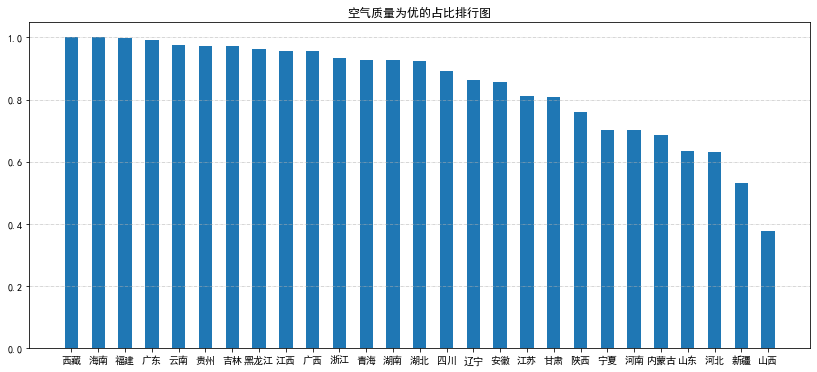

In [56]:
fig=plt.figure(figsize=(14,6))
plt.bar(ans3.index,#横轴
       ans3,#纵轴
       width=0.5#宽度
       )
plt.grid(
linestyle='-.',
linewidth=0.5,
axis='y')
plt.title('空气质量为优的占比排行图')

## 各省份空气不同质量等级的天数

In [69]:
ans4=pd.pivot_table(data,
              index='省',
              columns='质量等级',
              values='AQI指数',
              aggfunc='count',
              fill_value=0)
#把有污染的天数合并
ans4['污染']=ans4[['严重污染','重度污染','轻度污染','重度污染']].sum(axis=1)
ans4

质量等级,严重污染,中度污染,优,良,轻度污染,重度污染,污染
省,,,,,,,
云南,0,0,333,8,0,0,0
内蒙古,0,1,149,65,2,0,2
吉林,0,0,271,8,0,0,0
四川,0,0,304,37,0,0,0
宁夏,0,0,109,46,0,0,0
安徽,0,0,318,54,0,0,0
山东,0,0,236,136,0,0,0
山西,0,0,128,212,1,0,1
广东,0,0,400,3,0,0,0


<BarContainer object of 27 artists>

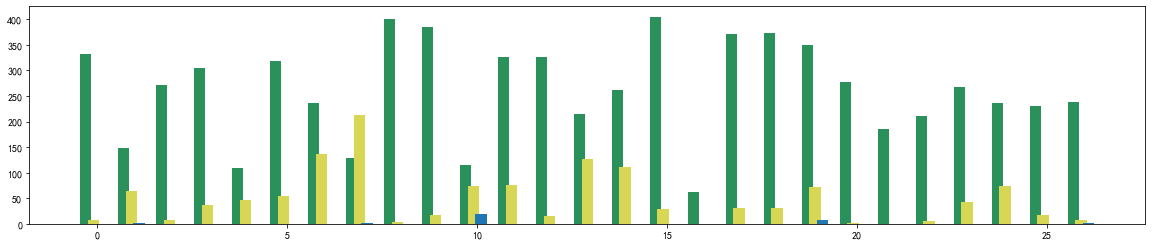

In [88]:
fig=plt.figure(figsize=(20,4))
plt.bar(
    np.arange(27)-0.3,
    ans4['优'],#柱子高度
    width=0.3,
    color='#2a915a')
plt.bar(
    np.arange(27)-0.1,
    ans4['良'],
    width=0.3,
    color='#d7d755')
plt.bar(
    np.arange(27)+0.1,
    ans4['污染'],
    width=0.3)